<a href="https://colab.research.google.com/github/GabrielRibeiro5402/Gabriel-Ribeiro-dos-Santos/blob/main/ITA%C3%9A_Est%C3%A1gio_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE EXPLORATÓRIA DOS DADOS**

---




---


## REFERENTE A VAGA DE ESTÁGIO EM DADOS - ITAÚ

---

Link do DataSet:(https://www.kaggle.com/datasets/raziehghahartars/ecommerce)

Nome: Gabriel Ribeiro dos Santos

CPF: 538.719.308 - 65

## NOTEADOR PARA A ANÁLISE

### Analisando a base de dados, qual o tipo de público (considerando gênero e idade) e o canal ideal para vender determinado tipo de produto?

### Importando Bibliotecas

---



In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gbr
import datetime

### Visualização do DataFrame

---



In [170]:
df = pd.read_csv('/content/Ecommerce_DBS.csv')
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.849426,-86.258278
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668


### DICIONÁRIO DOS DADOS

---


`Customer ID`: is a Unique ID assigned to each customer based on the country.

`Purchase Date`: The date of purchase for a customer is in a short date format.

`Product Category`: The category of product on the website.

`Product Price`: The price of the purchased item.

`Quantity`: The number of products that customers bought

`Total Purchase Amount`: The purchase since the current purchase.

`NPS`: The Satisfaction factor of the customer (0 the worst to 10 the best)

`Customer Age`: This field is a numerical field range from 18-70.

`Gender`: Male/ Female.

`Source`: the source where the customer is redirected to the website.

`Country`: Customer’s country. (The United States/ Canada)

`State`: Customer state.

`Latitude`: Latitude of living state

`Longitude`: Longitude of living state.

### Visualizando informações sobre o DataFrame

---

Informações referentes a **dados nulos**

Dropar colunas desnecessárias como `'Customer ID'`, `'Total Purchase Amount'`

Alteraração de `'Purchase Date'` para **datetime**

**Describe** para visualizar informaçòes estatisticas.


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [172]:
df.isnull().values.any()

False

In [173]:
df = df.drop(['Customer ID', 'Total Purchase Amount','State', 'Latitude', 'Longituide'], axis=1)

In [174]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'],  format="%d/%m/%Y")

In [175]:
print(df['Gender'].value_counts())
print('-------------------------')

print(df['Product Category'].value_counts())
print('-------------------------')

print(df['Source'].value_counts())

Gender
Female    125560
Male      124440
Name: count, dtype: int64
-------------------------
Product Category
Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: count, dtype: int64
-------------------------
Source
Instagram Campign    70170
FaceBook campaign    66773
SEM                  66743
Organic Search       46314
Name: count, dtype: int64


In [176]:
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Purchase Date,250000,2021-11-06 11:32:12.825599744,2020-01-01 00:00:00,2020-12-02 00:00:00,2021-11-06 00:00:00,2022-10-11 00:00:00,2023-09-15 00:00:00,NaN
Product Price,250000.0,254.66,10.0,132.0,255.0,377.0,500.0,141.57
Quantity,250000.0,3.0,1.0,2.0,3.0,4.0,5.0,1.41
NPS,250000.0,4.99,0.0,2.0,5.0,8.0,10.0,3.17
Customer Age,250000.0,43.76,18.0,30.0,44.0,57.0,70.0,15.39


## **PERGUNTAS PARA ANÁLISE**

---





1. Quais os produtos mais vendidos considerando os últimos 3 anos

2. Qual o produto mais caro e o mais barato?

3. Qual categoria de produto mais vendida e menos vendida? Qual categoria mais e menos cara?

4. Qual produto com melhor e pior NPS?


### 1. QUAIS PRODUTOS MAIS VENDIDOS CONSIDERANDO OS ÚLTIMOS 3 ANOS?

---



**Nos últimos três anos, os produtos mais vendidos foram:**

1. **Clothing** com 139438 vendas (cerca de 30%)

2. **Books** com 138448 vendas (cerca de 29%)

3. **Eletronics** com 92389 vendas (20%)

In [177]:
#pegar a data de hoje
current_date = datetime.datetime.now()

#filtrar os dados dos últimos 3 anos com base na data de hoje
three_years_ago = current_date - pd.DateOffset(years=3)
df_last_3_years = df[df['Purchase Date'] >= three_years_ago]
df_last_3_years.head()

,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source,Country
1,2022-03-05,Home,468,4,8,20,Male,Instagram Campign,Canada
2,2022-05-23,Home,288,2,10,20,Male,SEM,United States
5,2023-03-07,Home,250,4,3,20,Female,Instagram Campign,United States
6,2023-04-15,Electronics,73,1,8,20,Female,Instagram Campign,United States
9,2023-09-13,Electronics,394,2,4,20,Male,SEM,United States


In [178]:
vendas_3_anos = df_last_3_years.groupby('Product Category')['Quantity'].sum().reset_index()
vendas_3_anos

,Product Category,Quantity
0,Books,138289
1,Clothing,139267
2,Electronics,92279
3,Home,91621


<ipython-input-179-4e0b4fb73f92>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


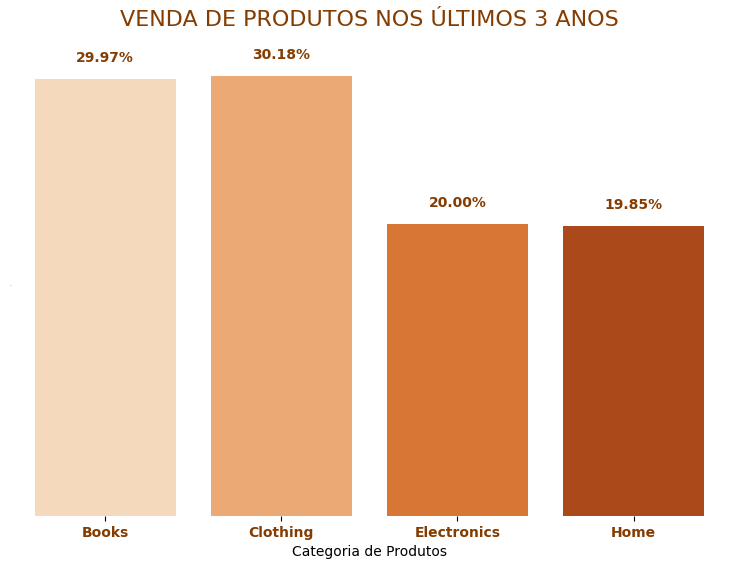

In [179]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Product Category', y='Quantity', hue='Product Category', data=vendas_3_anos, palette='Oranges')

plt.title('VENDA DE PRODUTOS NOS ÚLTIMOS 3 ANOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)


plt.xlabel('Categoria de Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total_quantity = vendas_3_anos['Quantity'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total_quantity:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

### 2. QUAL O PRODUTO MAIS CARO E O MAIS BARATO?

---



Analisando a faixa de preços dos produtos disponíveis foi possível notar que todas categorias de produtos possuem um **valor mínimo de 10** e um **valor máximo de 500.**

In [180]:
produto_caro_barato = df.groupby('Product Category').apply(lambda x: pd.Series({
    'Produto Mais Caro': x.loc[x['Product Price'].idxmax()]['Product Price'],
    'Produto Mais Barato': x.loc[x['Product Price'].idxmin()]['Product Price']
})).reset_index()

produto_caro_barato = produto_caro_barato.melt(id_vars='Product Category',
                                  value_vars=['Produto Mais Caro', 'Produto Mais Barato'],
                                  var_name='Tipo de Produto', value_name='Preço')

produto_caro_barato.head()

,Product Category,Tipo de Produto,Preço
0,Books,Produto Mais Caro,500
1,Clothing,Produto Mais Caro,500
2,Electronics,Produto Mais Caro,500
3,Home,Produto Mais Caro,500
4,Books,Produto Mais Barato,10


<ipython-input-181-e5043e2413a8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


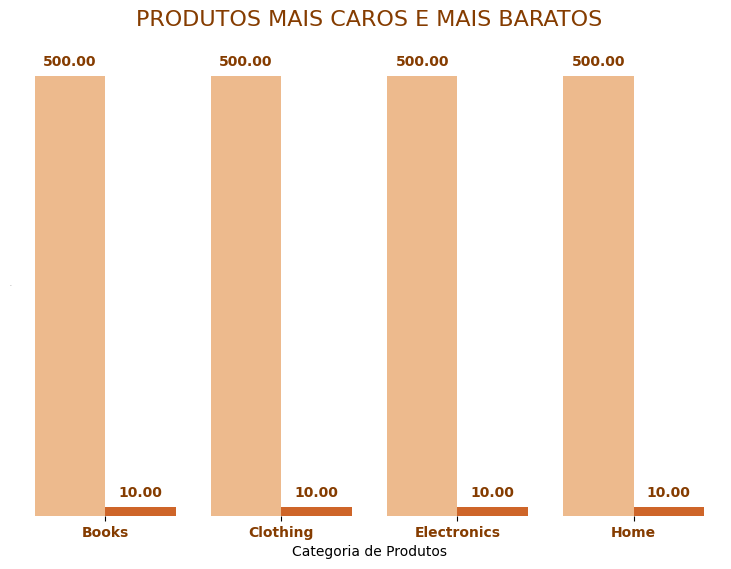

In [181]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.barplot(x='Product Category', y='Preço', hue='Tipo de Produto', data=produto_caro_barato, palette='Oranges', legend=False)

plt.title('PRODUTOS MAIS CAROS E MAIS BARATOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Categoria de Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

for p in plot.patches:
    height = p.get_height()
    if height > 0:
      plot.annotate(f'{height:.2f}',
                  (p.get_x() + p.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center', va='bottom', color='#853c00', fontsize=10, fontweight = 'bold')
plt.show()

### 3. QUAL A CATEGORIA DE PRODUTO MAIS VENDIDA E MENOS VENDIDA? QUAL A CATEGRIA MAIS E MENOS CARA?

---



A categoria de produto **mais vendida é Clothing** **com uma porcentagem de vendas totais de 30.1%**. Em contrapartida, a categoria **menos vendida é Home com uma porcentagem de vendas totais de 20%**, o que pode indicar uma necessidade de revisão de estratégias nesta categoria.

Em termos de preços, **a categoria mais cara é Home, com um preço médio de 254.84, A categoria menos cara é Clothing, com um preço médio de 254.44.**

In [182]:
produtos_mais_vendidos = df.groupby('Product Category')['Quantity'].sum().reset_index()
produtos_mais_vendidos

,Product Category,Quantity
0,Books,223876
1,Clothing,225322
2,Electronics,150828
3,Home,149698


<ipython-input-183-b47d4d459581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Product Category', y='Quantity', data=produtos_mais_vendidos, palette='Oranges')
<ipython-input-183-b47d4d459581>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


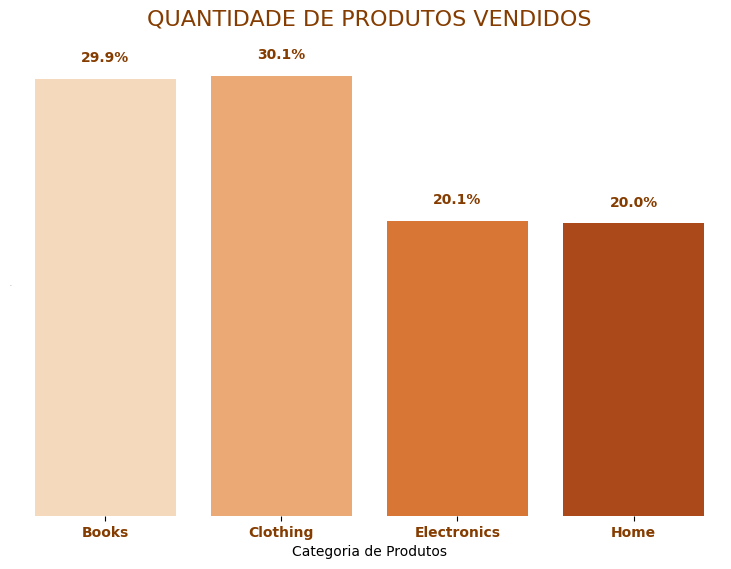

In [183]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.barplot(x='Product Category', y='Quantity', data=produtos_mais_vendidos, palette='Oranges')

plt.title('QUANTIDADE DE PRODUTOS VENDIDOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Categoria de Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total_quantity = produtos_mais_vendidos['Quantity'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total_quantity:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

In [184]:
produtos_medias_valor = df.groupby('Product Category')['Product Price'].mean().reset_index()
produtos_medias_valor

,Product Category,Product Price
0,Books,254.709152
1,Clothing,254.446264
2,Electronics,254.723364
3,Home,254.841688


<ipython-input-185-cb673339377c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Product Category', y='Product Price', data=produtos_medias_valor, palette='Oranges')
<ipython-input-185-cb673339377c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


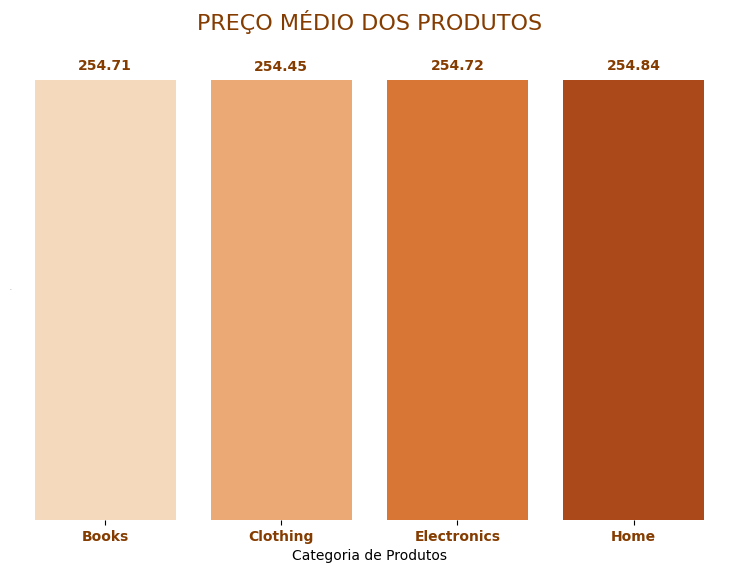

In [185]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.barplot(x='Product Category', y='Product Price', data=produtos_medias_valor, palette='Oranges')

plt.title('PREÇO MÉDIO DOS PRODUTOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Categoria de Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

for p in plot.patches:
    height = p.get_height()
    if height > 0:
      plot.annotate(f'{height:.2f}',
                  (p.get_x() + p.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center', va='bottom', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

### 4. QUAL O PRODUTO COM MELHOR E PIOR NPS?

---



**Todas** categorias possuem produtos com **NPS mínimo de 0 e máximo de 10**

O produto com o **melhor NPS** (Net Promoter Score) **médio é Home**, indicando um alto nível de satisfação.

Por outro lado, o produto com o **pior NPS é Eletronics**, sugerindo que há áreas que necessitam de melhorias para atender melhor às expectativas dos clientes

In [186]:
max_min_nps = df.groupby('Product Category').apply(lambda x: pd.Series({
    'Produto Maior NPS': x.loc[x['NPS'].idxmax()]['NPS'],
    'Produto Menor NPS': x.loc[x['NPS'].idxmin()]['NPS']
})).reset_index()

max_min_nps = max_min_nps.melt(id_vars='Product Category',
                                  value_vars=['Produto Maior NPS', 'Produto Menor NPS'],
                                  var_name='Maior e Menor', value_name='NPS')

max_min_nps

,Product Category,Maior e Menor,NPS
0,Books,Produto Maior NPS,10
1,Clothing,Produto Maior NPS,10
2,Electronics,Produto Maior NPS,10
3,Home,Produto Maior NPS,10
4,Books,Produto Menor NPS,0
5,Clothing,Produto Menor NPS,0
6,Electronics,Produto Menor NPS,0
7,Home,Produto Menor NPS,0


<ipython-input-187-1aa8a69d6fd0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


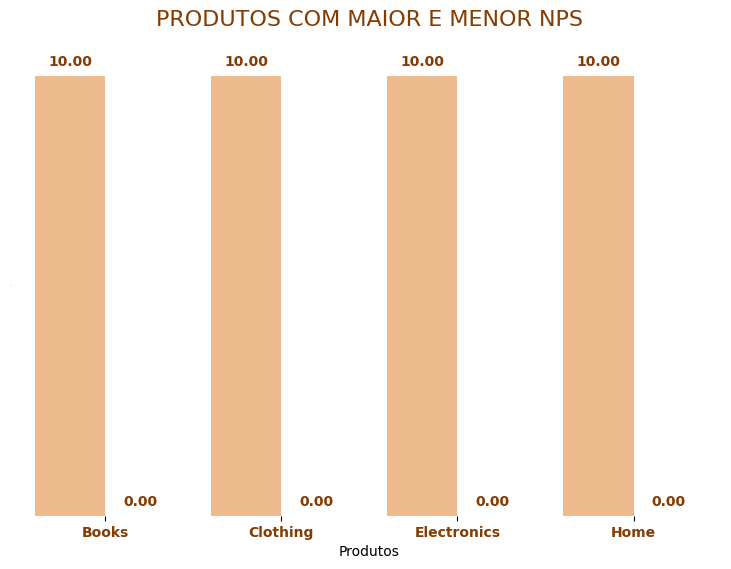

In [187]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.barplot(x='Product Category', y='NPS', hue='Maior e Menor', data=max_min_nps, palette='Oranges', legend=False)

plt.title('PRODUTOS COM MAIOR E MENOR NPS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

for p in plot.patches:
    height = p.get_height()

    plot.annotate(f'{height:.2f}',
                  (p.get_x() + p.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center', va='bottom', color='#853c00', fontsize=10, fontweight = 'bold')
plt.show()

In [188]:
produtos_nps_medias_valor = df.groupby('Product Category')['NPS'].mean().reset_index()
produtos_nps_medias_valor

,Product Category,NPS
0,Books,5.003698
1,Clothing,4.983904
2,Electronics,4.966544
3,Home,5.011394


<ipython-input-189-65afd5d6c925>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Product Category', y='NPS', data=produtos_nps_medias_valor, palette='Oranges')
<ipython-input-189-65afd5d6c925>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


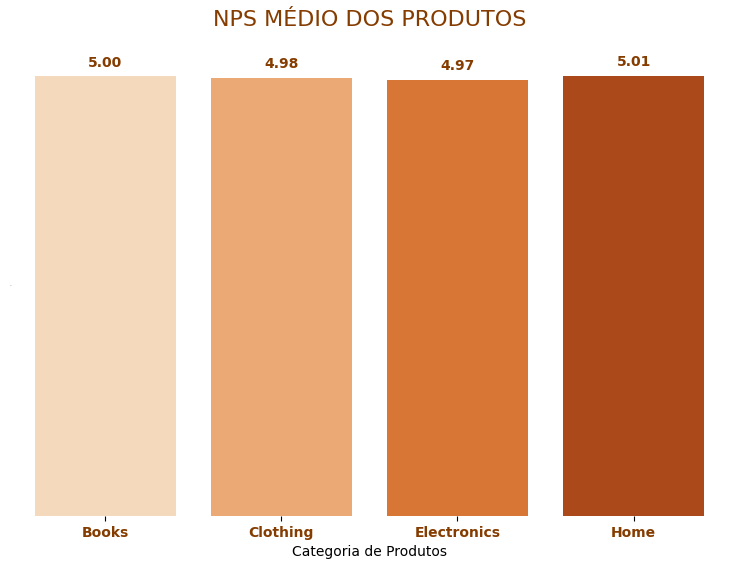

In [189]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.barplot(x='Product Category', y='NPS', data=produtos_nps_medias_valor, palette='Oranges')

plt.title('NPS MÉDIO DOS PRODUTOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Categoria de Produtos', fontsize=10)

nlabels=['Books', 'Clothing', 'Electronics', 'Home']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

for p in plot.patches:
    height = p.get_height()
    if height > 0:
      plot.annotate(f'{height:.2f}',
                  (p.get_x() + p.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center', va='bottom', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

## **ANÁLISE DAS VENDAS**

---



### VENDAS PELO TIPO DE FONTES

---

Analisando as vendas pelo tipo de fontes ou canais, é possivel notar que o canal **Instagram Campign** **lidera com cerca de 28% de vendas totais**.


Agrupando `'Source'` e `'Quantity'`

Utilizando o **groupby** para analisar informaões referentes a **vendas** por diferentes **fontes**

In [190]:
vendas_por_fonte = df.groupby('Source')['Quantity'].sum().reset_index()

In [191]:
vendas_por_fonte

,Source,Quantity
0,FaceBook campaign,199500
1,Instagram Campign,210473
2,Organic Search,138999
3,SEM,200752


<ipython-input-192-ecb1494d64fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Source', y='Quantity', data=vendas_por_fonte, palette='Oranges')
<ipython-input-192-ecb1494d64fc>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


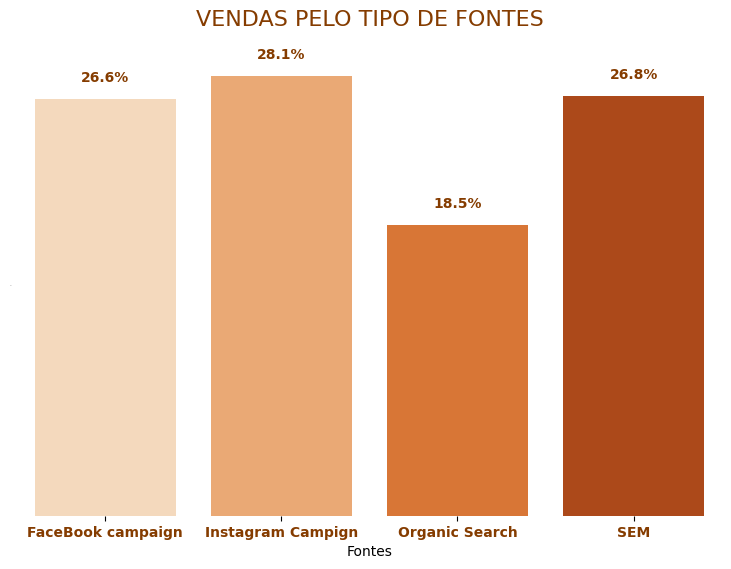

In [192]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Source', y='Quantity', data=vendas_por_fonte, palette='Oranges')

plt.title('VENDAS PELO TIPO DE FONTES', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Fontes', fontsize=10)

nlabels=['FaceBook campaign', 'Instagram Campign', 'Organic Search', 'SEM']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total_quantity = vendas_por_fonte['Quantity'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total_quantity:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

### VENDAS POR GÊNERO

---
Analisando as Vendas por Gênero, é observável, que o **gênero Feminino é o que obtém maior porcentagem de vendas com cerca de 51%.**

Agrupando `'Gender'` e `'Quantity'`

Utilizando o **groupby** para análises referentes a quantidade de **vendas** por **gênero**

In [193]:
vendas_genero = df.groupby('Gender')['Quantity'].sum().reset_index()
vendas_genero

,Gender,Quantity
0,Female,376045
1,Male,373679


<ipython-input-194-fbabee37601e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


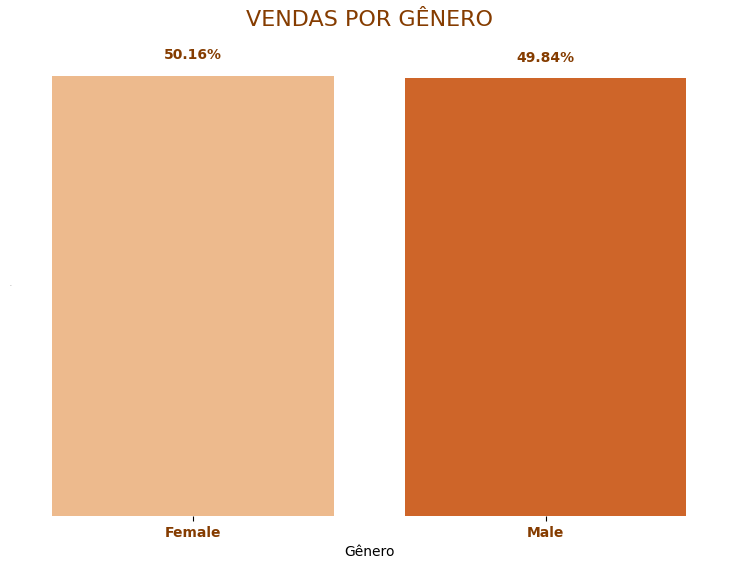

In [194]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Gender', y='Quantity', hue='Gender', data=vendas_genero, palette='Oranges')

plt.title('VENDAS POR GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Gênero', fontsize=10)

nlabels=['Female', 'Male']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total_quantity = vendas_genero['Quantity'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total_quantity:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

### VENDAS POR FAIXA ETÁRIA


---

Analisando as Vendas por Faixa Etária, é observável, que a **Faixa de 18 - 23 anos é a que possui a maior porcentagem, cerca de 10%.**

In [196]:
min_age = df['Customer Age '].min()
max_age = df['Customer Age '].max() + 7

bins = list(range(min_age, max_age, 5))

# Definir os rótulos para as faixas etárias
rotulos = [f'{i}-{i+4}' for i in bins[:-1]]

# Criar a nova coluna 'Faixa Etária' usando pd.cut
df['Faixa Etária'] = pd.cut(df['Customer Age '], bins=bins, labels=rotulos, right=False)

vendas_por_faixa_etaria = df.groupby('Faixa Etária')['Quantity'].sum().reset_index()
vendas_por_faixa_etaria = vendas_por_faixa_etaria.sort_values(by='Faixa Etária')
vendas_por_faixa_etaria

,Faixa Etária,Quantity
0,18-22,76212
1,23-27,71377
2,28-32,70666
3,33-37,68598
4,38-42,71432
5,43-47,70156
6,48-52,70493
7,53-57,68688
8,58-62,70416
9,63-67,68783


<ipython-input-198-278039f82ba5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')


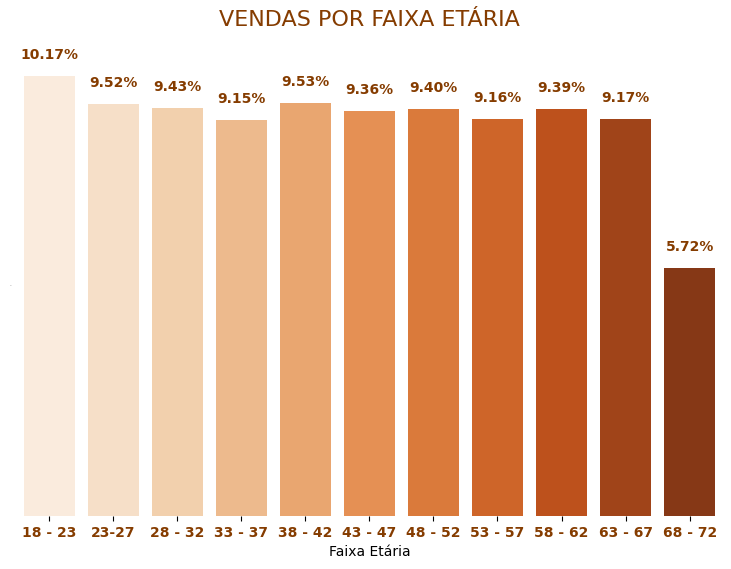

In [198]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Faixa Etária', y='Quantity', hue='Faixa Etária', data=vendas_por_faixa_etaria, palette='Oranges')

plt.title('VENDAS POR FAIXA ETÁRIA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Faixa Etária', fontsize=10)

xlabels=['18 - 23', '23-27', '28 - 32', '33 - 37', '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 62', '63 - 67', '68 - 72']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total_quantity = vendas_por_faixa_etaria['Quantity'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total_quantity:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

## DEMAIS ANALISES

---



#### DISTRIBUIÇÃO DE GÊNERO

Pode se observar como os G6eneros estão distribuidos na base de dados.

Notável que o gênero Feminino está em maior quantidade, porem não é uma grande diferença.

Feminino - cerca de 50.2%

Masculino - cerca de 49.8%

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.countplot(data = df, x='Gender', hue='Gender', palette='Oranges', dodge=False)

plt.title('DISTRIBUIÇÃO DE GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel([], fontsize=0)

nlabels=['Male', 'Female']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df.Gender)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

In [ ]:
df.columns

#### DISTRIBUIÇÃO DE IDADE

Neste gráfico de densidade pode se observar que a idade mais frequenteente relatada, está entre os 20 a 25 anos.

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.kdeplot(data = df, x='Customer Age ', color='#e46c0a', fill=True, alpha=.5)

plt.title('DISTRIBUIÇÃO DE IDADE', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel([], fontsize=0)

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df["Customer Age "])
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

#### DISTRIBUIÇÃO DE CANAIS

Na distribuiçào dos canais notável que o **Instagram Campign** é o canal mais utilizado com cerca de 28% do total.

In [ ]:
df.Source.unique()

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.countplot(data = df, x='Source', hue='Source', palette='Oranges', dodge=False)

plt.title('DISTRIBUIÇÃO DE CANAIS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel([], fontsize=0)

nlabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df.Source)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

#### DISTRIBUIÇÃO DE PRODUTOS

A distribuição dos produtos apresentou uma diferença após sua análise, por mais que todas análises os elementyos apresentaram números bem próximos, bem balanceados, a distribuição dos produtos apresentou um empate na porcentagem de duas categorias de produtos sendo elas, **Clothing** e **Books**, ambas com 30% de distribuição total.

In [ ]:
df['Product Category'].unique()

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)
plot = sns.countplot(data = df, x='Product Category', hue='Product Category', palette='Oranges', dodge=False)

plt.title('DISTRIBUIÇÃO DE PRODUTOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel([], fontsize=0)

nlabels=['Electronics', 'Home', 'Clothing', 'Books']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='#853c00', fontweight = 'bold');


ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df['Product Category'])
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

#### RELAÇÃO - GÊNERO E CATEGORIA DE PRODUTOS

Como já visulizado o gênero Feminino se mostra superior ao Masculino na análise, nesta relação não é diferente, todas as categorias de produtos possuem mais o gênero Feminino.

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data = df, x='Gender', hue='Product Category', palette='Oranges')

plt.title('RELAÇÃO - GÊNERO E CATEGORIA DE PRODUTOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

llabels=['Electronics', 'Home', 'Clothing', 'Books']
plt.legend(loc='best', labels=llabels)

plt.xlabel([], fontsize=0)

xlabels=['Male', 'Female']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold');


ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df['Product Category'])
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

#### RELAÇÃO - GÊNERO E CANAIS

Como já visulizado o gênero Feminino se mostra superior ao Masculino na análise, nesta relação não é diferente, todos os canais possuem mais o gênero Feminino. Sendo preferível então a venda para mulheres principalmente pelo Instagram Campign.

In [ ]:
plt.figure(figsize=(25, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data = df, x='Gender', hue='Source', palette='Oranges')

plt.title('RELAÇÃO - GÊNERO E CANAIS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

llabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plt.legend(loc='lower right', labels=llabels)

plt.xlabel([], fontsize=0)

xlabels=['Male', 'Female']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold');


ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df['Source'])
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=10, fontweight = 'bold')

plt.show();

#### RELAÇÃO - IDADE E CATEGORIA DE PRODUTOS

Não há diferença na distribuição das idades pelas categorias de produtos.

In [ ]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

plot = sns.boxplot(data = df, x = 'Product Category', y ='Customer Age ', color='#e46c0a', linecolor="black", linewidth=.70, gap=.1, width=.7)

xlabels=['Electronics', 'Home', 'Clothing', 'Books']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

plt.title('RELAÇÃO - IDADE E CATEGORIA DE PRODUTOS', pad = 20, fontsize=16, color='#853c00')
plt.xlabel('Categoria de Produtos', fontsize=10, color='black')
plt.ylabel('Idade', fontsize=10, color='black');

#### RELAÇÃO - IDADE E  CANAIS

Não há diferença significativa na distribuição das idades pelos canais de venda.

In [ ]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

plot = sns.boxplot(data = df, x = 'Source', y ='Customer Age ', color='#e46c0a', linecolor="black", linewidth=.70, gap=.1, width=.7)

xlabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

plt.title('RELAÇÃO - IDADE E CANAIS', pad = 20, fontsize=16, color='#853c00')
plt.xlabel('Canais', fontsize=10, color='black')
plt.ylabel('Idade', fontsize=10, color='black');

####RELAÇÃO - CANAIS E CATEGORIA DE PRODUTOS

Possível notar que todas categorias de produtos performam melhor pelo canal, Intagram Campign e pior pelo canal Organic Search.

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data = df, x='Product Category', hue='Source', palette='Oranges')

plt.title('RELAÇÃO - CANAIS E CATEGORIA DE PRODUTOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

llabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plt.legend(loc='best', labels=llabels)

plt.xlabel([], fontsize=0)

xlabels=['Electronics', 'Home', 'Clothing', 'Books']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(df['Product Category'])
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='#853c00', fontsize=8, fontweight = 'bold')

plt.show();

## ANÁLISE DETALHADA DE CADA PRODUTO

---



---







### ELETRONICS

---



#### **RELAÇÃO DE `ELETRONICS` E `SOURCE`**

Para produtos eletrônicos, o canal que **mais resultou em vendas foi** o **Instagram Campign**, sendo responsável por aproximadamente **28%** das vendas. Os canais **SEM** e **FaceBook campaign** demonstraram desempenhos semelhantes, sendo juntos responsáveis por aproximadamente **52%**. O canal **Organic Search** apresentou desempenho inferior, sendo responsável por cerca de **18%** das vendas.

Portanto, o canal ideal de vendas para produtos eletrônicos é o **Instagram Campign**.

In [ ]:
electronics_df = df[df['Product Category'] == 'Electronics']
electronics_df_source = electronics_df.groupby('Product Category')['Source'].value_counts()
electronics_df_source = pd.DataFrame(electronics_df_source)
electronics_df_source

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Source', y='count',hue='Source',palette='Oranges', data=electronics_df_source, legend=False)

plt.title('USO DOS CANAIS PARA A VENDA DE ELETRÔNICOS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = electronics_df_source['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **REALAÇÃO DE `ELETRONICS` E `CUSTOMER AGE`**

Ao analisar as vendas de produtos eletrônicos por faixa etária, observamos que a maior parte das vendas ocorreu entre os clientes com idades entre **18 - 23**, representando cerca de **10%** do total de vendas. As faixas etárias **23-27** e **38-42** também demonstraram um volume significativo de vendas, juntas contribuindo com aproximadamente 18%. Em contraste, a faixa etária **68-72** teve a menor participação, correspondendo a **5%** das vendas.

Assim, a faixa etária ideal para direcionar os esforços de marketing de produtos eletrônicos é a de **18 - 23**.

In [ ]:
min_age = electronics_df['Customer Age '].min()
max_age = electronics_df['Customer Age '].max() + 7

# Definir os intervalos de idade de 5 em 5 anos com base na idade mínima e máxima
bins = list(range(min_age, max_age, 5))

# Definir os rótulos para as faixas etárias
rotulos = [f'{i}-{i+4}' for i in bins[:-1]]

# Criar a nova coluna 'Faixa Etária' usando pd.cut
electronics_df['Faixa Etária'] = pd.cut(df['Customer Age '], bins=bins, labels=rotulos, right=False)

electronics_df_age = electronics_df.groupby('Product Category')['Faixa Etária'].value_counts()
electronics_df_age = pd.DataFrame(electronics_df_age)
electronics_df_age

In [ ]:
plt.figure(figsize=(24, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Faixa Etária', y='count',hue='Faixa Etária', palette='Oranges', data=electronics_df_age, legend=False)

plt.title('VENDA DE ELETRÔNICOS POR FAIXA ETÁRIA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['18 - 23', '23-27', '28 - 32', '33 - 37', '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 62', '63 - 67', '68 - 72']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = electronics_df_age['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `ELETRONICS` E `GENDER`**

Em termos de gênero, as vendas de produtos eletrônicos foram predominantemente realizadas pelo gênero **Feminino**, que representou aproximadamente **51%** do total de vendas. Gênero Masculino foi responsável por cerca de **49%** das vendas, mostrando um envolvimento pouco menor, mas ainda muito significativo.

Portanto, o público ideal para campanhas de marketing de produtos eletrônicos é composto majoritariamente pelo **Gênero Feminino**.

In [ ]:
electronics_df_gender = electronics_df.groupby('Product Category')['Gender'].value_counts()
electronics_df_gender = pd.DataFrame(electronics_df_gender)
electronics_df_gender

In [ ]:
plt.figure(figsize=(25, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Gender', y='count',hue='Gender', palette='Oranges', data=electronics_df_gender, legend=False)

plt.title('VENDA DE ELETRÔNICOS POR GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Gênero', fontsize=10)

xlabels=['Female', 'Male']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = electronics_df_gender['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

### **HOME**

---



#### **RELAÇÃO DE `HOME` E `SOURCE`**

Para produtos de casa, o canal que **mais resultou em vendas foi** o **Instagram Campign**, sendo responsável por aproximadamente **28%** das vendas. Os canais **SEM** e **FaceBook campaign** demonstraram desempenhos semelhantes, sendo juntos responsáveis por aproximadamente **52%**. O canal **Organic Search** apresentou desempenho inferior, sendo responsável por cerca de **18%** das vendas.

Portanto, o canal ideal de vendas de Prodtos de Casa é o **Instagram Campign**.

In [ ]:
home_df = df[df['Product Category'] == 'Home']
home_df_source = home_df.groupby('Product Category')['Source'].value_counts()
home_df_source = pd.DataFrame(home_df_source)
home_df_source

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Source', y='count',hue='Source',palette='Oranges', data=home_df_source, legend=False)

plt.title('USO DOS CANAIS PARA A VENDA DE PRODUTOS DE CASA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = home_df_source['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `HOME` E `CUSTOMER AGE`**

Ao analisar as vendas de **produtos de casa** por faixa etária, observamos que a maior parte das vendas ocorreu entre os clientes com idades entre **18 - 23**, representando cerca de **10%** do total de vendas. As faixas etárias **23-27** e **48-52** também demonstraram um volume significativo de vendas, juntas contribuindo com aproximadamente **18%**. Em contraste, a faixa etária **68-72** teve a menor participação, correspondendo a **5%** das vendas.

Assim, a faixa etária ideal para direcionar é a de **18 - 23**.

In [ ]:
bins = list(range(min_age, max_age, 5))
rotulos = [f'{i}-{i+4}' for i in bins[:-1]]

home_df['Faixa Etária'] = pd.cut(home_df['Customer Age '], bins=bins, labels=rotulos, right=False)

home_df_age = home_df.groupby('Product Category')['Faixa Etária'].value_counts()
home_df_age = pd.DataFrame(home_df_age)
home_df_age

In [ ]:
plt.figure(figsize=(24, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Faixa Etária', y='count',hue='Faixa Etária', palette='Oranges', data=home_df_age, legend=False)

plt.title('VENDA DE PRODUTOS DE CASA POR FAIXA ETÁRIA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['18 - 23', '23-27', '28 - 32', '33 - 37', '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 62', '63 - 67', '68 - 72']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = home_df_age['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `HOME` E `GENDER`**

Em termos de gênero, as vendas de produtos para Casa foram predominantemente realizadas pelo gênero **Feminino**, que representou aproximadamente **51%** do total de vendas. Gênero Masculino foi responsável por cerca de **49%** das vendas, mostrando um envolvimento pouco menor, mas ainda muito significativo.

Portanto, o público ideal para campanhas de marketing de produtos para Casa é composto majoritariamente pelo **Gênero Feminino**.

In [ ]:
home_df_gender = home_df.groupby('Product Category')['Gender'].value_counts()
home_df_gender = pd.DataFrame(home_df_gender)
home_df_gender

In [ ]:
plt.figure(figsize=(25, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Gender', y='count',hue='Gender', palette='Oranges', data=home_df_gender, legend=False)

plt.title('VENDA DE PRODUTOS PARA CASA POR GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Gênero', fontsize=10)

xlabels=['Female', 'Male']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = home_df_gender['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

### CLOTHING

---



#### **RELAÇÃO DE `CLOTHING` E `SOURCE`**
Para Roupas, o canal que **mais resultou em vendas foi** o **Instagram Campign**, sendo responsável por aproximadamente **28%** das vendas. Os canais **SEM** e **FaceBook campaign** demonstraram desempenhos semelhantes, sendo juntos responsáveis por aproximadamente **52%**. O canal **Organic Search** apresentou desempenho inferior, sendo responsável por cerca de **18%** das vendas.

Portanto, o canal ideal de vendas de Roupas é o **Instagram Campign**.

In [ ]:
clothing_df = df[df['Product Category'] == 'Clothing']
clothing_df_source = clothing_df.groupby('Product Category')['Source'].value_counts()
clothing_df_source = pd.DataFrame(clothing_df_source)
clothing_df_source

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Source', y='count',hue='Source',palette='Oranges', data=clothing_df_source, legend=False)

plt.title('USO DOS CANAIS PARA A VENDA DE ROUPAS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['Instagram Campign', 'SEM', 'FaceBook campaign', 'Organic Search']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = clothing_df_source['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `CLOTHING` E `CUSTOMER AGE`**

Ao analisar as vendas de **Roupas** por faixa etária, observamos que a maior parte das vendas ocorreu entre os clientes com idades entre **18 - 23**, representando cerca de **10%** do total de vendas. As faixas etárias **23-27** e **38-42** também demonstraram um volume significativo de vendas, juntas contribuindo com aproximadamente **18%**. Em contraste, a faixa etária **68-72** teve a menor participação, correspondendo a **5%** das vendas.

Assim, a faixa etária ideal para direcionar é a de **18 - 23.**

In [ ]:
bins = list(range(min_age, max_age, 5))
rotulos = [f'{i}-{i+4}' for i in bins[:-1]]

clothing_df['Faixa Etária'] = pd.cut(clothing_df['Customer Age '], bins=bins, labels=rotulos, right=False)

clothing_df_age = clothing_df.groupby('Product Category')['Faixa Etária'].value_counts()
clothing_df_age = pd.DataFrame(clothing_df_age)
clothing_df_age

In [ ]:
plt.figure(figsize=(24, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Faixa Etária', y='count',hue='Faixa Etária', palette='Oranges', data=clothing_df_age, legend=False)

plt.title('VENDA DE ROUPAS POR FAIXA ETÁRIA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['18 - 23', '23-27', '28 - 32', '33 - 37', '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 62', '63 - 67', '68 - 72']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = clothing_df_age['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `CLOTHING` E `GENDER`**

Em termos de gênero, as vendas de Roupas foram predominantemente realizadas pelo gênero **Feminino**, que representou aproximadamente **51%** do total de vendas. Gênero Masculino foi responsável por cerca de **49%** das vendas, mostrando um envolvimento pouco menor, mas ainda muito significativo.

Portanto, o público ideal para campanhas de marketing de Roupas é composto majoritariamente pelo **Gênero Feminino**.

In [ ]:
clothing_df_gender = clothing_df.groupby('Product Category')['Gender'].value_counts()
clothing_df_gender = pd.DataFrame(clothing_df_gender)
clothing_df_gender

In [ ]:
plt.figure(figsize=(25, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Gender', y='count',hue='Gender', palette='Oranges', data=clothing_df_gender, legend=False)

plt.title('VENDA DE ROUPAS POR GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Gênero', fontsize=10)

xlabels=['Female', 'Male']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = clothing_df_gender['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

### BOOKS

---


#### **RELAÇÃO DE `BOOKS` E `SOURCE`**

Para Livros, o canal que **mais resultou em vendas foi** o **Instagram Campign**, sendo responsável por aproximadamente **28%** das vendas. Os canais **SEM** e **FaceBook campaign** demonstraram desempenhos semelhantes, sendo juntos responsáveis por aproximadamente **52%**. O canal **Organic Search** apresentou desempenho inferior, sendo responsável por cerca de **18%** das vendas.

Portanto, o canal ideal de vendas de Livros é o **Instagram Campign**.

In [ ]:
books_df = df[df['Product Category'] == 'Books']
books_df_source = books_df.groupby('Product Category')['Source'].value_counts()
books_df_source = pd.DataFrame(books_df_source)
books_df_source

In [ ]:
plt.figure(figsize=(20, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Source', y='count',hue='Source',palette='Oranges', data=books_df_source, legend=False)

plt.title('USO DOS CANAIS PARA A VENDA DE LIVROS', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['Instagram Campign', 'SEM', 'FaceBook Campaign', 'Organic Search']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = books_df_source['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `BOOKS` E `CUSTOMER AGE`**

Ao analisar as vendas de **Livros** por faixa etária, observamos que a maior parte das vendas ocorreu entre os clientes com idades entre **18 - 23**, representando cerca de **10%** do total de vendas. As faixas etárias **38-42** e **28-32** também demonstraram um volume significativo de vendas, juntas contribuindo com aproximadamente **18%**. Em contraste, a faixa etária 68-72 teve a menor participação, correspondendo a **5%** das vendas.

Assim, a faixa etária ideal para direcionar é a de **18 - 23.**

In [ ]:
bins = list(range(min_age, max_age, 5))
rotulos = [f'{i}-{i+4}' for i in bins[:-1]]

books_df['Faixa Etária'] = pd.cut(books_df['Customer Age '], bins=bins, labels=rotulos, right=False)

books_df_age = books_df.groupby('Product Category')['Faixa Etária'].value_counts()
books_df_age = pd.DataFrame(books_df_age)
books_df_age

In [ ]:
plt.figure(figsize=(24, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Faixa Etária', y='count',hue='Faixa Etária', palette='Oranges', data=books_df_age, legend=False)

plt.title('VENDA DE LIVROS POR FAIXA ETÁRIA', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Canais', fontsize=10)

xlabels=['18 - 23', '23-27', '28 - 32', '33 - 37', '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 62', '63 - 67', '68 - 72']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = books_df_age['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();

#### **RELAÇÃO DE `BOOKS` E `GENDER`**

Em termos de gênero, as vendas de **Livros** foram predominantemente realizadas pelo gênero **Feminino**, que representou aproximadamente **51%** do total de vendas. Gênero Masculino foi responsável por cerca de **49%** das vendas, mostrando um envolvimento pouco menor, mas ainda muito significativo.

Portanto, o público ideal para campanhas de marketing de **Livros** é composto majoritariamente pelo **Gênero Feminino**.

In [ ]:
books_df_gender = books_df.groupby('Product Category')['Gender'].value_counts()
books_df_gender = pd.DataFrame(books_df_gender)
books_df_gender

In [ ]:
plt.figure(figsize=(25, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.barplot(x='Gender', y='count',hue='Gender', palette='Oranges', data=books_df_gender, legend=False)

plt.title('VENDA DE LIVROS POR GÊNERO', pad = 20, fontsize=16, color='#853c00')
sns.despine(bottom =True, left=True)

plt.xlabel('Gênero', fontsize=10)

xlabels=['Female', 'Male']
plot.set_xticklabels(labels=xlabels, fontsize=10, color='#853c00', fontweight = 'bold')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = books_df_gender['count'].sum()
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.2f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                      color='#853c00', fontsize=10, fontweight='bold')

plt.show();